<a href="https://colab.research.google.com/github/gshreya5/colab/blob/main/Taio_BA_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the Domestic Market (Contract) Blow Molding, Low price

**Blow molding** is a manufacturing process used to produce hollow plastic parts by inflating a heated plastic tube called a "parison" inside a mold until it takes the desired shape. 


**MARKET RESEARCH**

According to recent reports, the global blow molded plastics market is projected to grow significantly in the coming years, with a projected CAGR of nearly 3% to 12.9% from 2022 to 2030. The packaging industry is a key driver of this growth, with rising demand from end-use industries like food and beverage, pharmaceuticals, personal care and cosmetics, and e-commerce. The market is expected to reach approximately USD 100 billion by 2030. [[Source]](https://www.globenewswire.com/news-release/2023/02/15/2609093/0/en/Blow-Molded-Plastics-Market-Size-Worth-100-Billion-by-2030-The-Brainy-Insights.html) 

**GOAL**

Predicting the domestic market (contract) blow molding can help companies make informed decisions about their production and sales strategies. By analyzing market trends, demand, and competition, companies can determine the best approach to meet consumer needs and achieve profitable growth.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1BSO9_52GLGwe2WrtB3TpS9QqXGk3mM0L/export?format=csv', index_col='Date', parse_dates=True)

## Explore dataset

In [3]:
df.head()

,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,...,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import,South_korea_import
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,41,NaN,NaN,27.18,25.51,1.289,6902.1,863.1,29.207387,135.0,...,NaN,NaN,"6,833,222.00","2,649,293.00","35,239,920.00",NaN,NaN,NaN,NaN,NaN
2000-01-02,41,NaN,NaN,29.35,27.78,1.377,6584.4,972.7,33.391099,136.0,...,NaN,NaN,"5,647,987.00","2,787,667.00","36,716,752.00",NaN,NaN,NaN,NaN,NaN
2000-01-03,45,NaN,NaN,29.89,27.49,1.516,6424.1,1330.5,30.941913,136.0,...,NaN,NaN,"6,721,125.00","4,692,701.00","45,144,561.00",NaN,NaN,NaN,NaN,NaN
2000-01-04,47,NaN,NaN,25.74,22.76,1.465,7070.5,1227.5,31.930148,137.3,...,NaN,NaN,"7,169,182.00","2,565,068.00","32,240,349.00",NaN,NaN,NaN,NaN,NaN
2000-01-05,47,NaN,NaN,28.78,27.74,1.487,7850.2,1526.3,31.201702,138.2,...,NaN,NaN,"10,466,333.00","4,671,325.00","29,351,633.00",NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Domestic Market (Contract) Blow Molding, Low',
       'Spot/Export Blow Molding', 'Spot, Domestic', 'WTISPLC', 'MCOILBRENTEU',
       'GASREGM', 'IMPCH', 'EXPCH', 'PRUBBUSDM', 'WPUFD4111',
       'PCU325211325211', 'PCU32611332611301', 'WPU0915021625',
       'PCU3252132521', 'MHHNGSP', 'WPU072205011', 'PCU32611132611115',
       'PCU32611332611301.1', 'PCU32611132611112', 'WPU0915021622',
       'Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials ',
       'Australia _export', 'Canada_export', 'Saudi_export', 'Usa_export',
       'India_export', 'Russia_export', 'South_Africa_export', 'Turkey',
       'Brazil', 'France_export', 'Germeny_export', 'United Kingdome_export',
       'China_export', 'Australia _import', 'Canada_import', 'Saudi_import',
       'Usa_import', 'India_import', 'Russia_import', 'South_Africa_import',
       'Turkey_import', 'Brazil_import', 'France_import', 'Germeny_import',
       'Un

In [5]:
# convert object dtype columns to float

for col in df.dtypes[df.dtypes == 'object'].index:
  df[col] = df[col].str.replace(',','')
  df[col] = df[col].astype('float')

In [6]:
# Create new features
df['Avg_Oil_Price'] = (df['WTISPLC'] + df['MCOILBRENTEU']) / 2

del df['WTISPLC'], df['MCOILBRENTEU']

df['Net_Trade_Balance'] = df['IMPCH'] - df['EXPCH']

del df['IMPCH'], df['EXPCH']

In [7]:
import_cols = ['Australia _import', 'Canada_import', 'Saudi_import',
       'Usa_import', 'India_import', 'Russia_import', 'South_Africa_import',
       'Turkey_import', 'Brazil_import', 'France_import', 'Germeny_import',
       'United Kingdome_import', 'China_import', 'Japan_import',
       'South_korea_import']

export_cols = ['Australia _export', 'Canada_export', 'Saudi_export', 'Usa_export',
       'India_export', 'Russia_export', 'South_Africa_export', 'Turkey',
       'Brazil', 'France_export', 'Germeny_export', 'United Kingdome_export',
       'China_export']

df['total_import'] = df[import_cols].mean(axis=1)
df['total_export'] = df[export_cols].mean(axis=1)

df = df.drop(columns=import_cols)
df = df.drop(columns=export_cols)


In [8]:
plastic_manufacturing_price = ['PCU325211325211', 'PCU32611332611301', 'PCU3252132521','PCU32611132611115', 'PCU32611332611301.1', 
           'PCU32611132611112','Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials ',
           'WPUFD4111', 'WPU0915021625', 'WPU072205011','WPU0915021622']

df['plastic_manufacturing_price'] = df[plastic_manufacturing_price].mean(axis=1)

df = df.drop(columns=plastic_manufacturing_price)

In [9]:
df['Gas_Price'] = (df['MHHNGSP']+df['GASREGM']) /2
del df['MHHNGSP'], df['GASREGM']

In [10]:
df.columns

Index(['Domestic Market (Contract) Blow Molding, Low',
       'Spot/Export Blow Molding', 'Spot, Domestic', 'PRUBBUSDM',
       'Avg_Oil_Price', 'Net_Trade_Balance', 'total_import', 'total_export',
       'plastic_manufacturing_price', 'Gas_Price'],
      dtype='object')

In [11]:
df.shape

(276, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276 entries, 2000-01-01 to 2022-01-12
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Domestic Market (Contract) Blow Molding, Low  276 non-null    int64  
 1   Spot/Export Blow Molding                      185 non-null    float64
 2   Spot, Domestic                                125 non-null    float64
 3   PRUBBUSDM                                     275 non-null    float64
 4   Avg_Oil_Price                                 276 non-null    float64
 5   Net_Trade_Balance                             275 non-null    float64
 6   total_import                                  275 non-null    float64
 7   total_export                                  275 non-null    float64
 8   plastic_manufacturing_price                   276 non-null    float64
 9   Gas_Price                                     

In [13]:
df.isnull().sum()[df.isnull().sum()>0]

Spot/Export Blow Molding     91
Spot, Domestic              151
PRUBBUSDM                     1
Net_Trade_Balance             1
total_import                  1
total_export                  1
dtype: int64

The "Spot/Export Blow Molding" and "Spot, Domestic" columns contain a high proportion of missing or null values that make them difficult to use in the analysis. Dropping these columns can eliminate this problem and make the analysis more feasible.

In [14]:
del df['Spot, Domestic'] , df['Spot/Export Blow Molding']

In [15]:
df = df.dropna()

### Remove outliers

In [ ]:
z_scores = np.abs((df - np.mean(df)) / np.std(df))

# Define a threshold beyond which a data point is considered an outlier
threshold = 3

# Identify the indices of the outliers
outlier_indices = np.where(z_scores > threshold)

# Remove the outliers
df = df[~np.isin(np.arange(len(df)), outlier_indices)]

In [17]:
df.describe()

,"Domestic Market (Contract) Blow Molding, Low",PRUBBUSDM,Avg_Oil_Price,Net_Trade_Balance,total_import,total_export,plastic_manufacturing_price,Gas_Price
count,262.000000,262.000000,262.000000,262.000000,2.620000e+02,2.620000e+02,262.000000,262.000000
mean,71.835878,86.398637,62.661031,22588.472501,6.700321e+07,5.264375e+07,168.993867,3.445187
std,19.351551,40.738854,26.733895,9056.334577,3.904426e+07,2.921266e+07,22.607379,1.054703
min,32.000000,22.119907,17.465000,5085.800000,7.916650e+06,6.431240e+06,129.060000,1.693000
25%,55.500000,60.420735,41.296250,15773.812894,3.343287e+07,2.207778e+07,154.071667,2.652250
50%,72.000000,78.167103,60.610000,24472.573558,6.370136e+07,5.889899e+07,168.359091,3.305000
75%,85.750000,105.491131,81.738750,29552.312497,9.661427e+07,7.072135e+07,179.845455,4.044375
max,108.000000,223.802741,118.775000,42892.395126,1.605274e+08,1.211192e+08,234.254636,6.819000


## Correlation

In [18]:
df.corr()['Domestic Market (Contract) Blow Molding, Low'][1:]

PRUBBUSDM                      0.653878
Avg_Oil_Price                  0.886676
Net_Trade_Balance              0.718936
total_import                   0.605159
total_export                   0.666196
plastic_manufacturing_price    0.674414
Gas_Price                      0.382795
Name: Domestic Market (Contract) Blow Molding, Low, dtype: float64

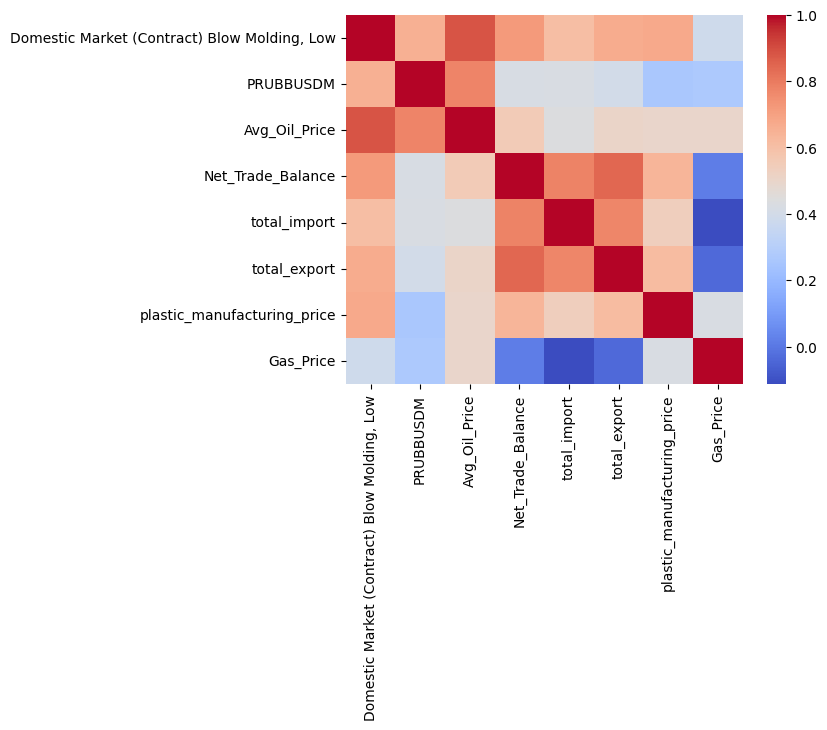

In [19]:
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

# Visualization

Plot the time series to visualize any trends or patterns.

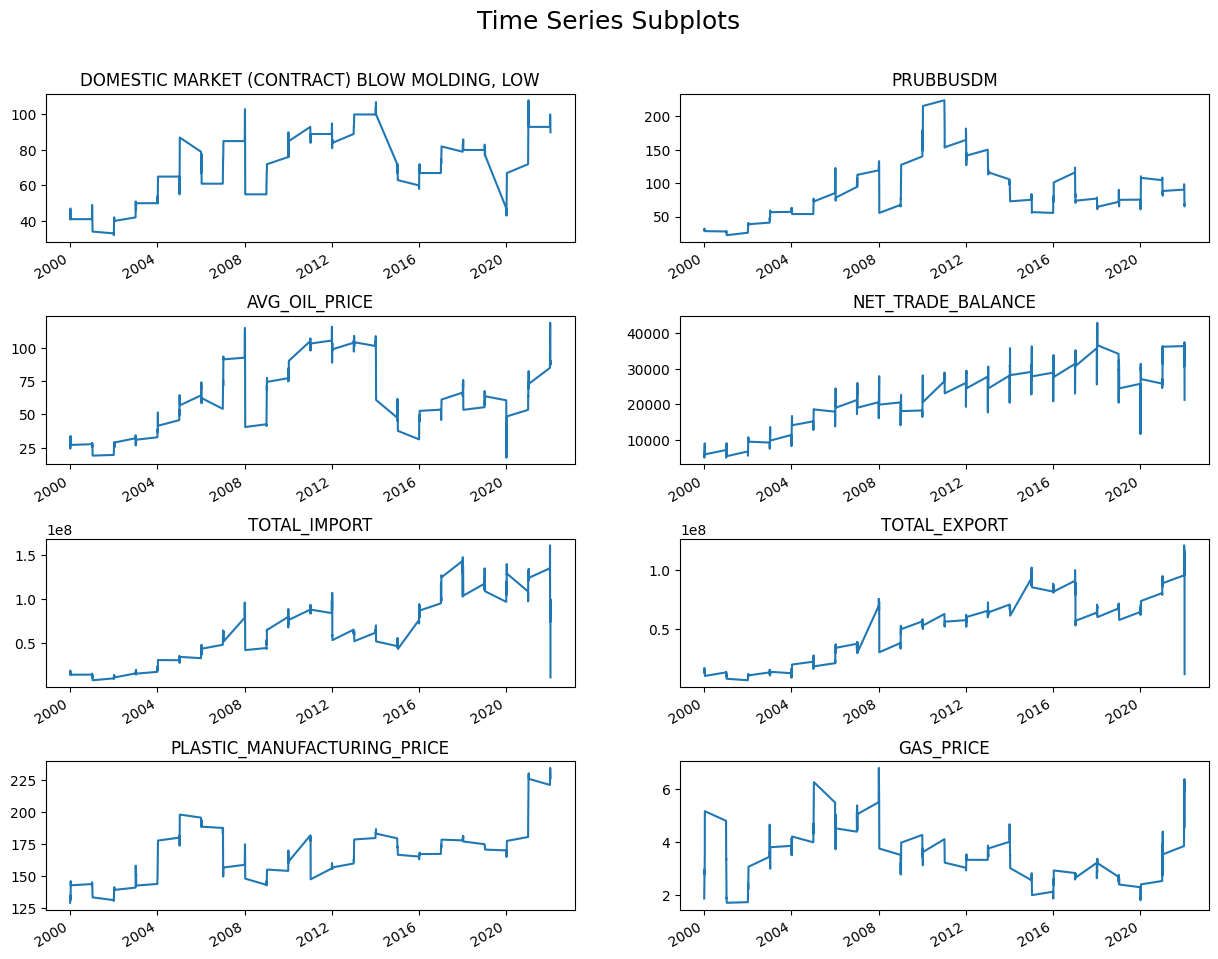

In [21]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Time Series Subplots", fontsize=18, y=0.95)

# loop through 
for col, ax in zip(df.columns, axs.ravel()):
    # filter df for ticker and plot on specified axes
    df[col].plot(ax=ax)

    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()

# Model Building


In [22]:
output = []

## BEASELINE MODEL - ARIMA 


##  Split the data into training and testing sets on normalised data


In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler on the data and transform it
df_scaled = scaler.fit_transform(df)

# convert the scaled data back into a dataframe
df_scaled = pd.DataFrame(df_scaled,index=df.index, columns=df.columns)

In [24]:
train_end_date = '2021-01-01' # set the end date of the training data
test_start_date = '2021-01-02' # set the start date of the testing data

train_data = df_scaled['Domestic Market (Contract) Blow Molding, Low'].loc[:train_end_date][:-3]
test_data = df_scaled['Domestic Market (Contract) Blow Molding, Low'].loc[test_start_date:][:-3]

## Build Model

In [25]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [ ]:
model = sm.tsa.ARIMA(pd.DataFrame(train_data), order=(2,1,2))
results = model.fit()

In [ ]:
predictions = results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

In [28]:
# evaluate the model on the testing set
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mse = mean_squared_error(test_data, predictions)
r2 = r2_score(test_data, predictions)
directional_accuracy = accuracy_score(test_data.diff().fillna(0).apply(lambda x: 1 if x>0 else 0), predictions.diff().fillna(0).apply(lambda x: 1 if x>0 else 0))

# print the evaluation metrics
print('RMSE:', rmse)
print('MSE:', mse)
print('R2:', r2)
print('Directional Accuracy:', directional_accuracy)

output.append(['ARIMA',rmse,mse,r2,directional_accuracy])

RMSE: 0.4931669450710255
MSE: 0.24321363571068788
R2: -26.25938010703295
Directional Accuracy: 0.42105263157894735


RMSE value is 0.49 which suggests that the model has moderate accuracy in predicting the target variable.

MSE value is 0.24 which indicates that the model has moderate accuracy.

R2 value is -26 which is a very low value, suggesting that the model is not a good fit for the data.

Directional Accuracy of 0.42 suggests that the model's predictions are correct 42% of the time.

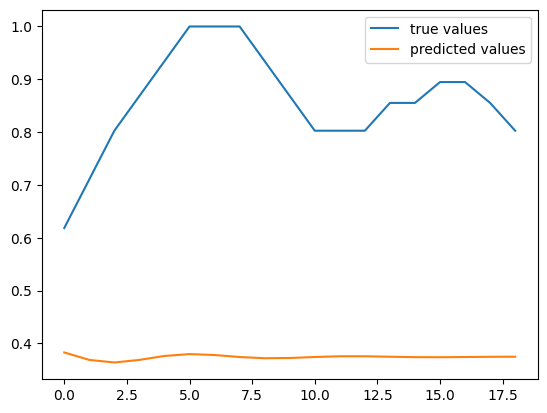

In [29]:
test_data.reset_index()['Domestic Market (Contract) Blow Molding, Low'].plot(label="true values")
predictions.reset_index()['predicted_mean'].plot(label="predicted values")
plt.legend()
plt.show();

The ARIMA model has not performed well since it has not made correct predictions. 

We will now build another time series model using SARIMA to improve the performance.

# SARIMA

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


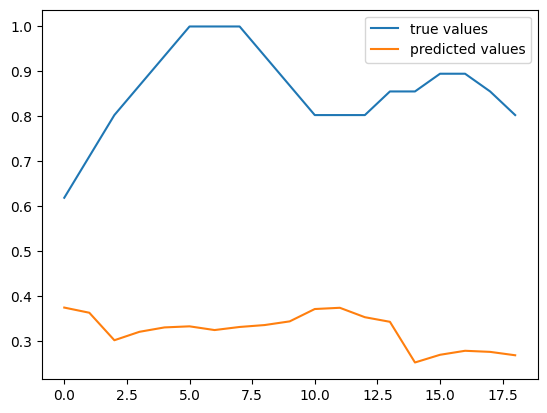

In [30]:
model=sm.tsa.statespace.SARIMAX(train_data,order=(1, 1, 1),seasonal_order=(1,1,1,12))
sarima_model=model.fit()

predictions = sarima_model.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

# evaluate the model on the testing set
rmse = np.sqrt(mean_squared_error(test_data, predictions))
mse = mean_squared_error(test_data, predictions)
r2 = r2_score(test_data, predictions)
directional_accuracy = accuracy_score(test_data.diff().fillna(0).apply(lambda x: 1 if x>0 else 0), predictions.diff().fillna(0).apply(lambda x: 1 if x>0 else 0))

output.append(['SARIMA',rmse,mse,r2,directional_accuracy])

test_data.reset_index()['Domestic Market (Contract) Blow Molding, Low'].plot(label="true values")
predictions.reset_index()['predicted_mean'].plot(label="predicted values")
plt.legend()
plt.show();

The SARIMA model has not performed well either.


# LSTM

In [31]:
pip install scikeras[tensorflow] --quiet

In [32]:
import torch
import torch.nn as nn
from sklearn.model_selection import RandomizedSearchCV
from scikeras.wrappers import KerasRegressor
from math import sqrt

from sklearn.model_selection import train_test_split

In [ ]:
features = ['PRUBBUSDM', 'Avg_Oil_Price', 'Net_Trade_Balance', 'total_import',
        'total_export', 'plastic_manufacturing_price', 'Gas_Price']
target = 'Domestic Market (Contract) Blow Molding, Low'

# Preprocess the data by scaling the features
scaler = MinMaxScaler()
df_scaled[features] = scaler.fit_transform(df[features])

# Split the data into training and testing sets
train_data, test_data = train_test_split(df_scaled, test_size=0.2)

# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        c0 = torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]
        out = self.linear(out)
        return out

# Define the hyperparameters
input_size = len(features)
hidden_size = 64
output_size = 1
learning_rate = 0.01
epochs = 100

# Initialize the model and optimizer
model = LSTM(input_size, hidden_size, output_size)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

# Train the model
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    x_train = train_data[features].values.reshape(-1, 1, input_size)
    y_train = train_data[target].values.reshape(-1, 1, 1)
    outputs = model(torch.tensor(x_train).float())
    loss = criterion(outputs, torch.tensor(y_train).float())
    loss.backward()
    optimizer.step()

# Evaluate the model on the testing set
model.eval()
x_test = test_data[features].values.reshape(-1, 1, input_size)
y_test = test_data[target].values.reshape(-1, 1)
with torch.no_grad():
    predictions = model(torch.tensor(x_test).float())

rmse = sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

output.append(['LSTM',rmse,mse,r2,np.nan])

In [34]:
print('RMSE:', rmse)
print('MSE:', mse)
print('R2:', r2)

RMSE: 0.24212545690190518
MSE: 0.05862473687995634
R2: -0.02685495697294571


The evaluation metrics you provided suggest that the LSTM model has a relatively low RMSE (0.25) and MSE (0.06), indicating that the model's predictions are fairly accurate. However, the R-squared value of -0.01 suggests that the model does not explain much of the variance in the target variable.

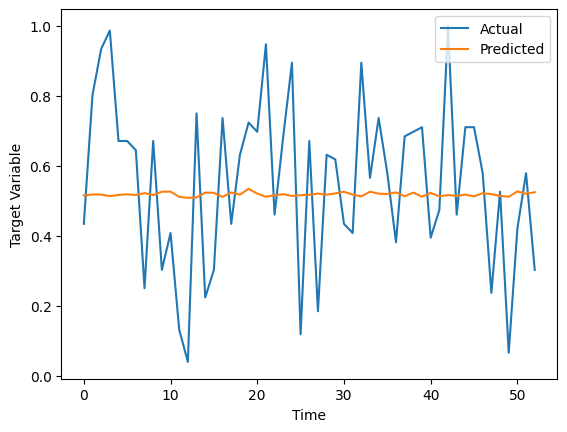

In [35]:
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

LSTM does not look to be a good model

# LazyPredict

In [36]:
!pip install lazypredict --quiet
from lazypredict.Supervised import LazyRegressor

In [37]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_features = df[features][:train_size]
test_features = df[features][train_size:]
train_target = df[target][:train_size]
test_target = df[target][train_size:]

# Initialize LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

# Fit the models and make predictions
models, _ = reg.fit(train_features, test_features, train_target, test_target)

100%|██████████| 42/42 [00:02<00:00, 20.15it/s]


In [38]:
models.head()

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LinearSVR,0.64,0.69,9.85,0.01
LassoLars,0.64,0.68,9.94,0.01
Lasso,0.64,0.68,9.94,0.02
LassoLarsCV,0.63,0.68,10.01,0.01
LarsCV,0.63,0.68,10.01,0.04


In [39]:
for model in models.head().index:
    output.append([model,models.loc[model]['RMSE'],np.nan,models.loc[model]['R-Squared'],np.nan])


This output suggests that LinearSVR, LassoLars, Lasso, LassoLarsCV and LarsCV can be potentially explored as machine learning models to predict the target.

# LinearSVR 

The R-squared of 0.69 suggests that the model explains a good amount of the variance in the target variable, and the RMSE indicates that, on average, the model's predictions are off by about 9.85 units from the true values.


In [40]:
from sklearn.svm import LinearSVR

X_train, y_train, X_test, y_test = train_features,train_target, test_features , test_target 

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
svm = LinearSVR()
svm.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = svm.predict(X_test_scaled)

# Highlight the time periods where the deviation is greater than the threshold


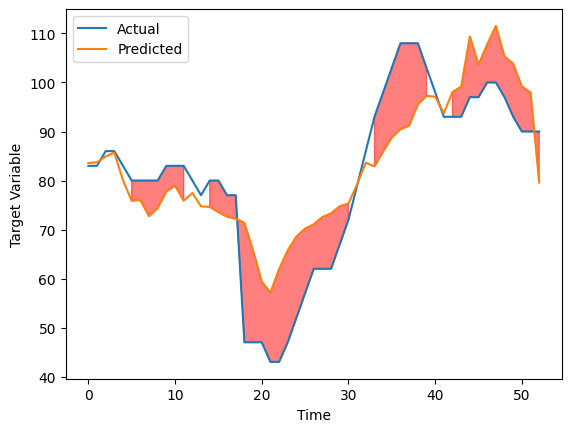

In [41]:

# Calculate the absolute deviation between the actual and predicted values
deviation = np.abs(y_test - y_pred)

# Highlight the time periods where the deviation is greater than the threshold
highlighted = deviation > threshold

plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')

plt.fill_between(np.arange(len(y_test)), y_test, y_pred, where=highlighted, color='red', alpha=0.5)

plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.show()

# OUTPUT

In [42]:
pd.DataFrame(output, columns=['Model','RMSE','MSE','R2','Directional Accuracy'] )

,Model,RMSE,MSE,R2,Directional Accuracy
0,ARIMA,0.49,0.24,-26.26,0.42
1,SARIMA,0.55,0.30,-32.53,0.53
2,LSTM,0.24,0.06,-0.03,NaN
3,LinearSVR,9.85,NaN,0.69,NaN
4,LassoLars,9.94,NaN,0.68,NaN
5,Lasso,9.94,NaN,0.68,NaN
6,LassoLarsCV,10.01,NaN,0.68,NaN
7,LarsCV,10.01,NaN,0.68,NaN


Thank you for tagging along.
Feedback is appreciated.